In [57]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 


In [58]:
data=pd.read_csv("data_clean.csv")

In [59]:
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


#initial visualization of data 
as we can see unnamed is not valid 
also temp c is copy of temp 
so drop

In [60]:
#removing duplicate cols 
#file.drop('col name ',axis=1,inplace=Ture)

data.drop("Unnamed: 0",axis=1,inplace=True)
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


#insight

In [61]:
#shape
data.shape

(158, 9)

In [62]:
#158 rows , 9 col
data.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [63]:
#month not appeared ie - data type incorect
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 11.2+ KB


#data type correction

In [64]:
#month data
data['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [65]:
data[data['Month']=="May"]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
23,32.0,92.0,12.0,61,May,24,2010,61,C


In [66]:
#replace 
data["Month"].replace('May','5',inplace=True)

In [67]:
data['Month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 158 entries, 0 to 157
Series name: Month
Non-Null Count  Dtype 
--------------  ----- 
158 non-null    object
dtypes: object(1)
memory usage: 1.4+ KB


In [82]:
# change data type 
data["Month"]=pd.to_numeric(data["Month"])

In [83]:
data['Month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 158 entries, 0 to 157
Series name: Month
Non-Null Count  Dtype
--------------  -----
158 non-null    int64
dtypes: int64(1)
memory usage: 1.4 KB


In [84]:
data['Month'].unique()

array([5, 6, 7, 8, 9], dtype=int64)

In [85]:
data.describe()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,7.031646,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,1.438421,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,5.000000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,6.000000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,7.000000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,8.000000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,9.000000,31.000000,2010.0,97.000000


#duplicate row drop


In [90]:
#detecting
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156     True
157    False
Length: 158, dtype: bool

In [91]:
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75,9,28,2010,75,S


In [96]:
#removing dupliactes
data.drop_duplicates(inplace=True)

In [98]:
data.duplicated().sum()

0

<Axes: >

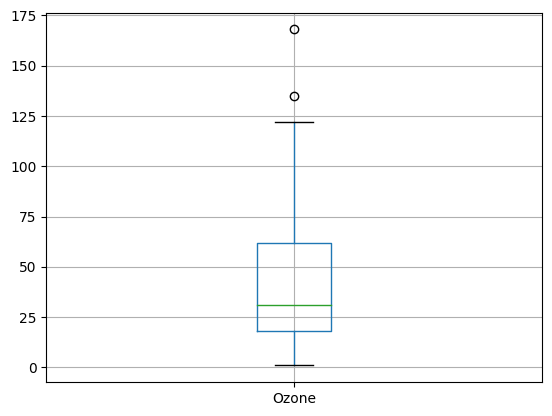

In [101]:
#outlier
data.boxplot(column=['Ozone'],grid=True)

(array([28., 36., 21.,  9., 11.,  7.,  3.,  2.,  1.,  1.]),
 array([  1. ,  17.7,  34.4,  51.1,  67.8,  84.5, 101.2, 117.9, 134.6,
        151.3, 168. ]),
 <BarContainer object of 10 artists>)

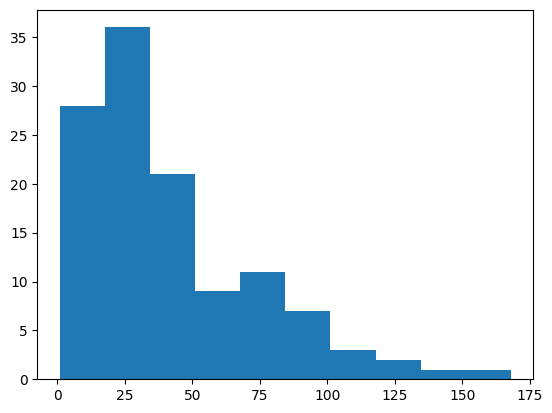

In [102]:
#hist
plt.hist(data['Ozone'])

In [103]:
#THERE ARE OUTLIERS
#------------------------
#RIGHT SKEWED MEAN>MED>MODE


In [104]:
#CALULATING OUTLIER AND REMOVEING 

#EMPTY VALUE

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    119 non-null    float64
 1   Solar.R  150 non-null    float64
 2   Wind     157 non-null    float64
 3   Temp C   157 non-null    object 
 4   Month    157 non-null    int64  
 5   Day      157 non-null    int64  
 6   Year     157 non-null    int64  
 7   Temp     157 non-null    int64  
 8   Weather  154 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 12.3+ KB


In [106]:
#null in ozone , solar , weather


In [107]:
#OZONE
#heatap visuals

data['Ozone'].isnull()

0      False
1      False
2      False
3      False
4       True
       ...  
152    False
153    False
154    False
155     True
157    False
Name: Ozone, Length: 157, dtype: bool

In [115]:
colours=['Green','Red']
sns.heatmap(data['Weather'])

IndexError: Inconsistent shape between the condition and the input (got (157, 1) and (157,))